In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df_train = pd.read_csv('sales_train.csv')
df_test = pd.read_csv('test.csv')
df_shops = pd.read_csv('shops.csv')
df_items = pd.read_csv('items.csv')
df_item_cats = pd.read_csv('item_categories.csv')

In [3]:
print(df_train.info())
print(df_test.info())
print(df_shops.info())
print(df_items.info())
print(df_item_cats.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null   

In [4]:
# Creating uber df
df_uber = pd.merge(df_train, df_shops, on='shop_id')
df_uber = pd.merge(df_uber, df_items, on='item_id')
df_uber = pd.merge(df_uber, df_item_cats, on = 'item_category_id')


In [5]:
#for linear, nn, knn, categorical features should be one-hot encoded

## Some feature generation

In [17]:
_date = pd.to_datetime(df_uber['date'], format='%d.%m.%Y')

# TODO add day of year/week, distance from Moskow, (flying avg) revenue from some neighbourhood dates?
# Frequency encoding of item id?
# time since particular event- days from new year?

df_uber['day_of_month']= _date.dt.day
df_uber['month']= _date.dt.month
df_uber['year']= _date.dt.year
df_uber['date']= _date

# City
df_uber['city'] = df_uber['shop_name'].replace('[0-9!"\?\.)(,]', '', regex=True).str.split().str[0]
# df_uber['shop'] = df_uber['shop_name'].replace(df_uber['city'], '').trim()

df_uber.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   shop_name           object        
 7   item_name           object        
 8   item_category_id    int64         
 9   item_category_name  object        
 10  day_of_month        int64         
 11  month               int64         
 12  year                int64         
 13  city                object        
dtypes: datetime64[ns](1), float64(2), int64(7), object(4)
memory usage: 336.0+ MB


In [18]:
df_uber.city.unique()

array(['Ярославль', 'Москва', 'Воронеж', 'Якутск', 'Коломна', 'Калуга',
       'ННовгород', 'Чехов', 'Химки', 'Сургут', 'СПб', 'Тюмень', 'Омск',
       'Самара', 'Новосибирск', 'Сергиев', 'Курск', 'Красноярск',
       'Волжский', 'Адыгея', 'Жуковский', 'Казань', 'Интернет-магазин',
       'Уфа', 'РостовНаДону', 'Вологда', 'Томск', 'Мытищи', 'Балашиха',
       'Выездная', 'Цифровой'], dtype=object)

## notes

in test set should we encode unseen categories by frequency (combined with train data)?
can improve its results using binary feature isnull

PLAN: use bag of words to find clusters of item names? however this advanced technique should be applied together with splitting on category_id

lemmatization and stemming - are also advanced techniques

word2vec can be used later, but item name has 2 languages (regroup into 2 features?)

it is really important to optimize exactly the metric we're given in the competition and not any other metric


In [7]:
# Experiment with count vectorizer

item_names = df_items['item_name'].replace('[0-9!"\?\.)(,\+\*\[\]/:\-\'&]', ' ', regex=True)
# item_names.sample(50)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), analyzer='char')
X = vectorizer.fit_transform(item_names)
X
vectorizer.get_feature_names()

[' #',
 ' =',
 ' _',
 ' `',
 ' a',
 ' b',
 ' c',
 ' d',
 ' e',
 ' f',
 ' g',
 ' h',
 ' i',
 ' j',
 ' k',
 ' l',
 ' m',
 ' n',
 ' o',
 ' p',
 ' q',
 ' r',
 ' s',
 ' t',
 ' u',
 ' v',
 ' w',
 ' x',
 ' y',
 ' z',
 ' «',
 ' °',
 ' »',
 ' а',
 ' б',
 ' в',
 ' г',
 ' д',
 ' е',
 ' ж',
 ' з',
 ' и',
 ' й',
 ' к',
 ' л',
 ' м',
 ' н',
 ' о',
 ' п',
 ' р',
 ' с',
 ' т',
 ' у',
 ' ф',
 ' х',
 ' ц',
 ' ч',
 ' ш',
 ' щ',
 ' ъ',
 ' ы',
 ' э',
 ' ю',
 ' я',
 ' ё',
 ' –',
 ' ‘',
 ' ’',
 ' ”',
 ' …',
 ' №',
 '# ',
 '#m',
 '#в',
 '#м',
 '#н',
 '; ',
 '= ',
 '\\в',
 '_ ',
 '_a',
 '_d',
 '_n',
 '_а',
 '` ',
 '`a',
 '`b',
 '`c',
 '`d',
 '`e',
 '`i',
 '`n',
 '`o',
 '`p',
 '`r',
 '`s',
 '`t',
 '`u',
 '`г',
 '`н',
 '`р',
 'a ',
 'a`',
 'aa',
 'ab',
 'ac',
 'ad',
 'ae',
 'af',
 'ag',
 'ah',
 'ai',
 'aj',
 'ak',
 'al',
 'am',
 'an',
 'ao',
 'ap',
 'aq',
 'ar',
 'as',
 'at',
 'au',
 'av',
 'aw',
 'ax',
 'ay',
 'az',
 'aс',
 'a’',
 'b ',
 'b`',
 'ba',
 'bb',
 'bc',
 'bd',
 'be',
 'bf',
 'bh',
 'bi',
 'bj',
 'bk'

## EDA

In [8]:
df_eda = df_uber.copy()
# extract meta category

def split_and_get_first(text, spliter):    
    splited = text.split(spliter)
    if len(splited)>1:
        return splited[0].strip()
    else:
        return text
    
df_eda['meta_category'] = df_eda['item_category_name'].map(lambda x: split_and_get_first(x, '-'))

# manually merge some categories
df_eda['meta_category'] = df_eda['meta_category'].map(lambda x: 'Карты оплаты' if 'Карты оплаты' in x else x)
df_eda['meta_category'] = df_eda['meta_category'].map(lambda x: 'Игры' if 'Игры' in x else x)
df_eda['meta_category'] = df_eda['meta_category'].map(lambda x: 'Чистые носители' if 'Чистые носители' in x else x)

# create day from start day
min_date = df_eda['date'].min()
df_eda['day_from_start'] = df_eda['date'] - min_date




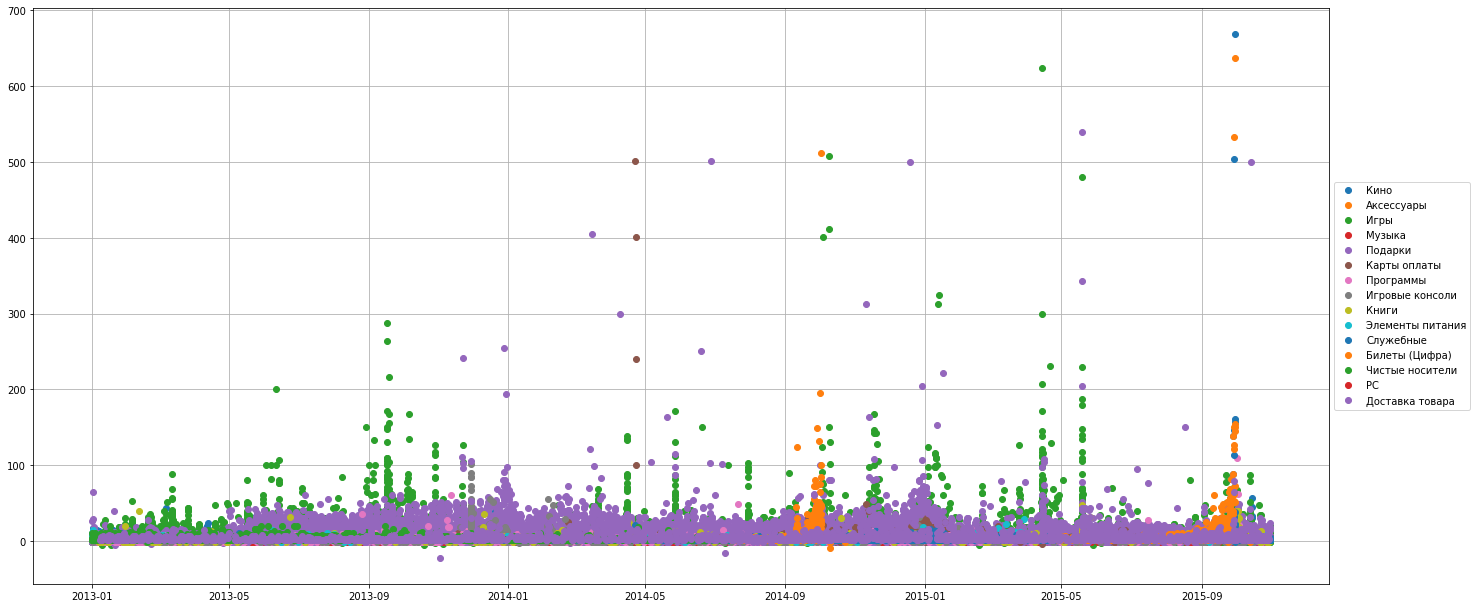

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(1)


# Plot
# fig, ax = plt.subplots()
ax =plt.axes([0, 0, 3, 2])
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#plt.figure(figsize=(20, 20))
for meta_category in df_eda['meta_category'].unique():
    df_meta_category = df_eda[(df_eda['meta_category'] == meta_category) & (df_eda['item_cnt_day'] < 1000)]
    ax.plot(df_meta_category['date'], df_meta_category['item_cnt_day'], marker='.', linestyle='', ms=12, label=meta_category)
# ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
#fig.tight_layout()

#plt.show()

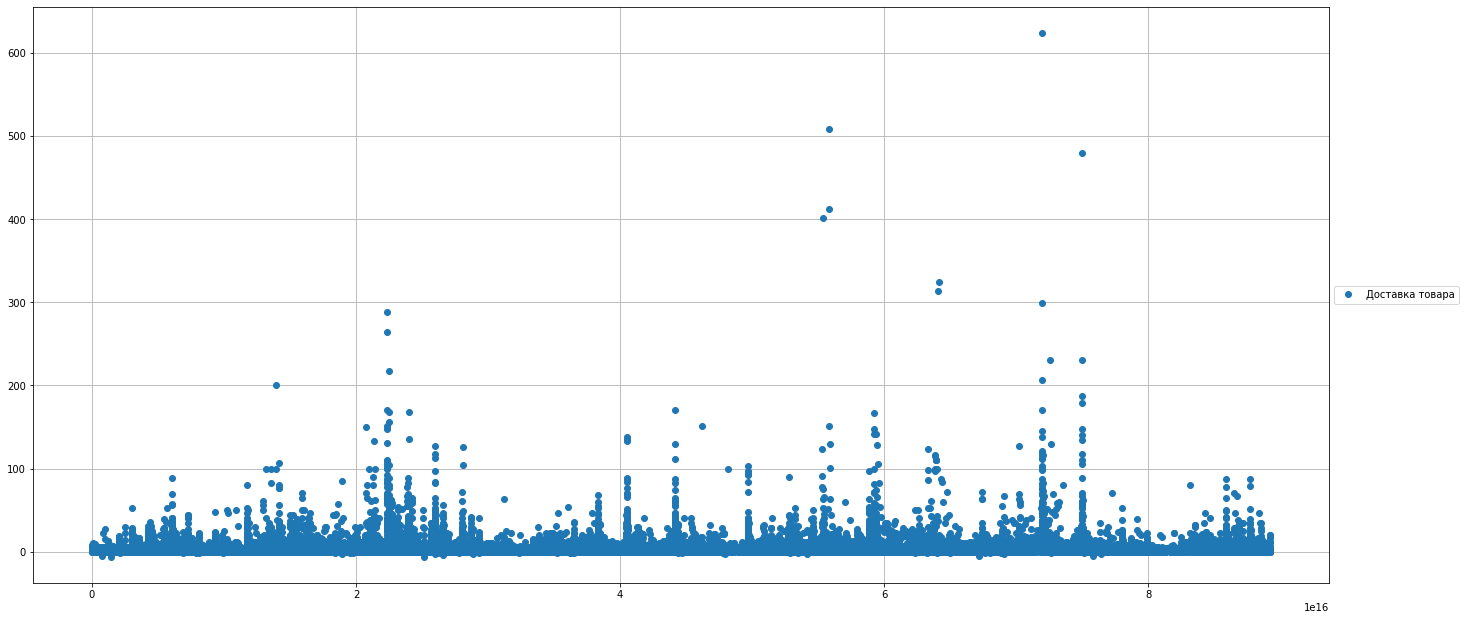

In [16]:
# outliers?
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(19680801)


# Plot
# fig, ax = plt.subplots()
ax =plt.axes([0, 0, 3, 2])
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#plt.figure(figsize=(20, 20))
df_meta_category = df_eda[df_eda['meta_category'] == 'Игры']
ax.plot(df_meta_category['day_from_start'], df_meta_category['item_cnt_day'], marker='.', linestyle='', ms=12, label=meta_category)
# ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
#fig.tight_layout()

#plt.show()

In [11]:
# outliers? seems not
df_eda[df_eda['item_cnt_day'] >= 1000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,day_of_month,month,year,city,meta_category,day_from_start
2717299,2015-01-15,24,12,20949,4.000000,1000.0,Интернет-магазин ЧС,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",15,1,2015,Интернет-магазин,Подарки,744 days
2900512,2015-10-28,33,12,11373,0.908714,2169.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара,28,10,2015,Интернет-магазин,Доставка товара,1030 days


## Validation

use moving window validation

## important !
https://www.coursera.org/learn/competitive-data-science/supplement/MaOIX/final-project-advice-2